In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Отключение предупреждения
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [74]:
df_test = pd.read_csv("KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
df_train  = pd.read_csv("KDDTest+.txt" , sep = "," , encoding = 'utf-8')

In [75]:
df_test.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [76]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [77]:
df_train.columns = columns
df_test.columns = columns

In [78]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


### Описание данных

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [80]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [81]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


Изучение ответов

In [82]:
results = set(df_train['attack'].values)
print(results, end=" ")

{'loadmodule', 'smurf', 'satan', 'mailbomb', 'multihop', 'portsweep', 'processtable', 'snmpguess', 'sqlattack', 'nmap', 'ps', 'mscan', 'land', 'apache2', 'snmpgetattack', 'xterm', 'imap', 'httptunnel', 'rootkit', 'ftp_write', 'buffer_overflow', 'back', 'named', 'phf', 'neptune', 'xlock', 'xsnoop', 'normal', 'ipsweep', 'udpstorm', 'teardrop', 'pod', 'warezmaster', 'sendmail', 'guess_passwd', 'worm', 'saint', 'perl'} 

### Классификация результатов атак

In [83]:
df_train_attack = df_train.attack.map(lambda a: 0 if a == 'normal' else 1)
df_test_attack = df_test.attack.map(lambda a: 0 if a == 'normal' else 1)

df_train['attack_state'] = df_train_attack
df_test['attack_state'] = df_test_attack

In [84]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0


### Предварительная обработка данных
Поиск недостающих данных

In [85]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

- Недостающих данных нет

Проверка на наличие дубликатов

In [86]:
df_test.duplicated().sum()

0

In [87]:
df_train.duplicated().sum()

0

In [88]:
df_test.duplicated().sum()

0

- Нет дублирующих данных

 Работа с отклонениями

In [89]:
df_train.shape

(22543, 44)

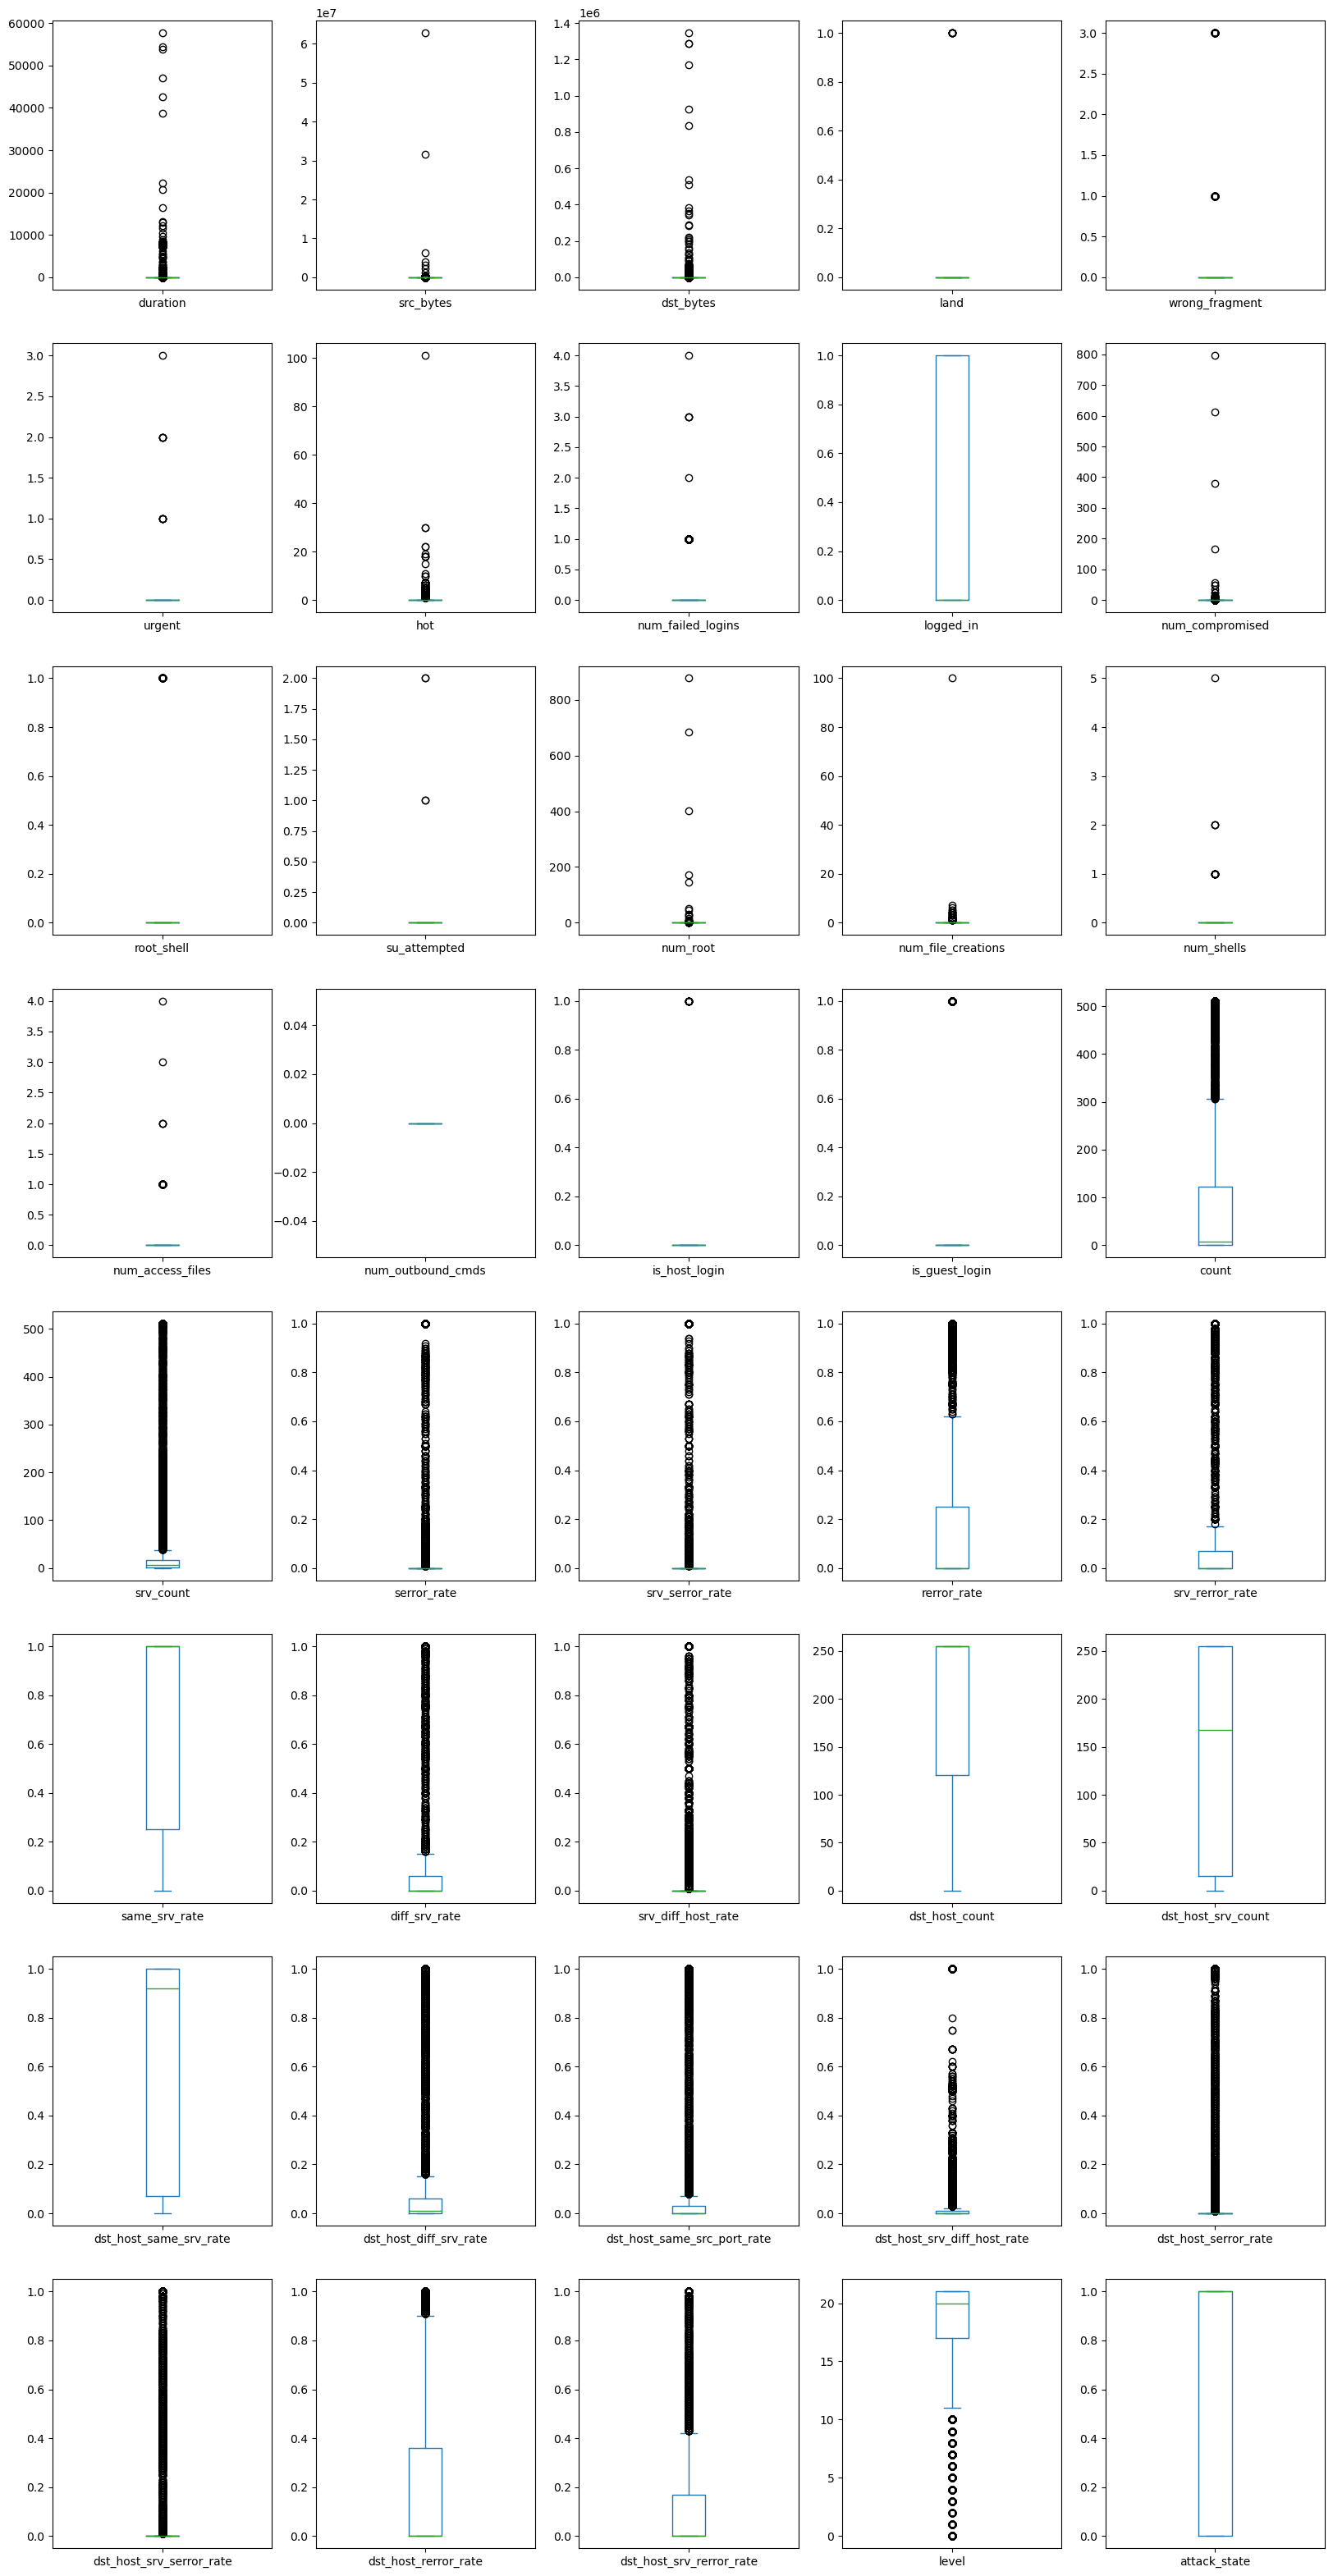

In [90]:
df_train.plot(kind='box', subplots=True, layout=(8,5), figsize=(20,40))
plt.show()

In [91]:
df_test.shape

(125972, 44)

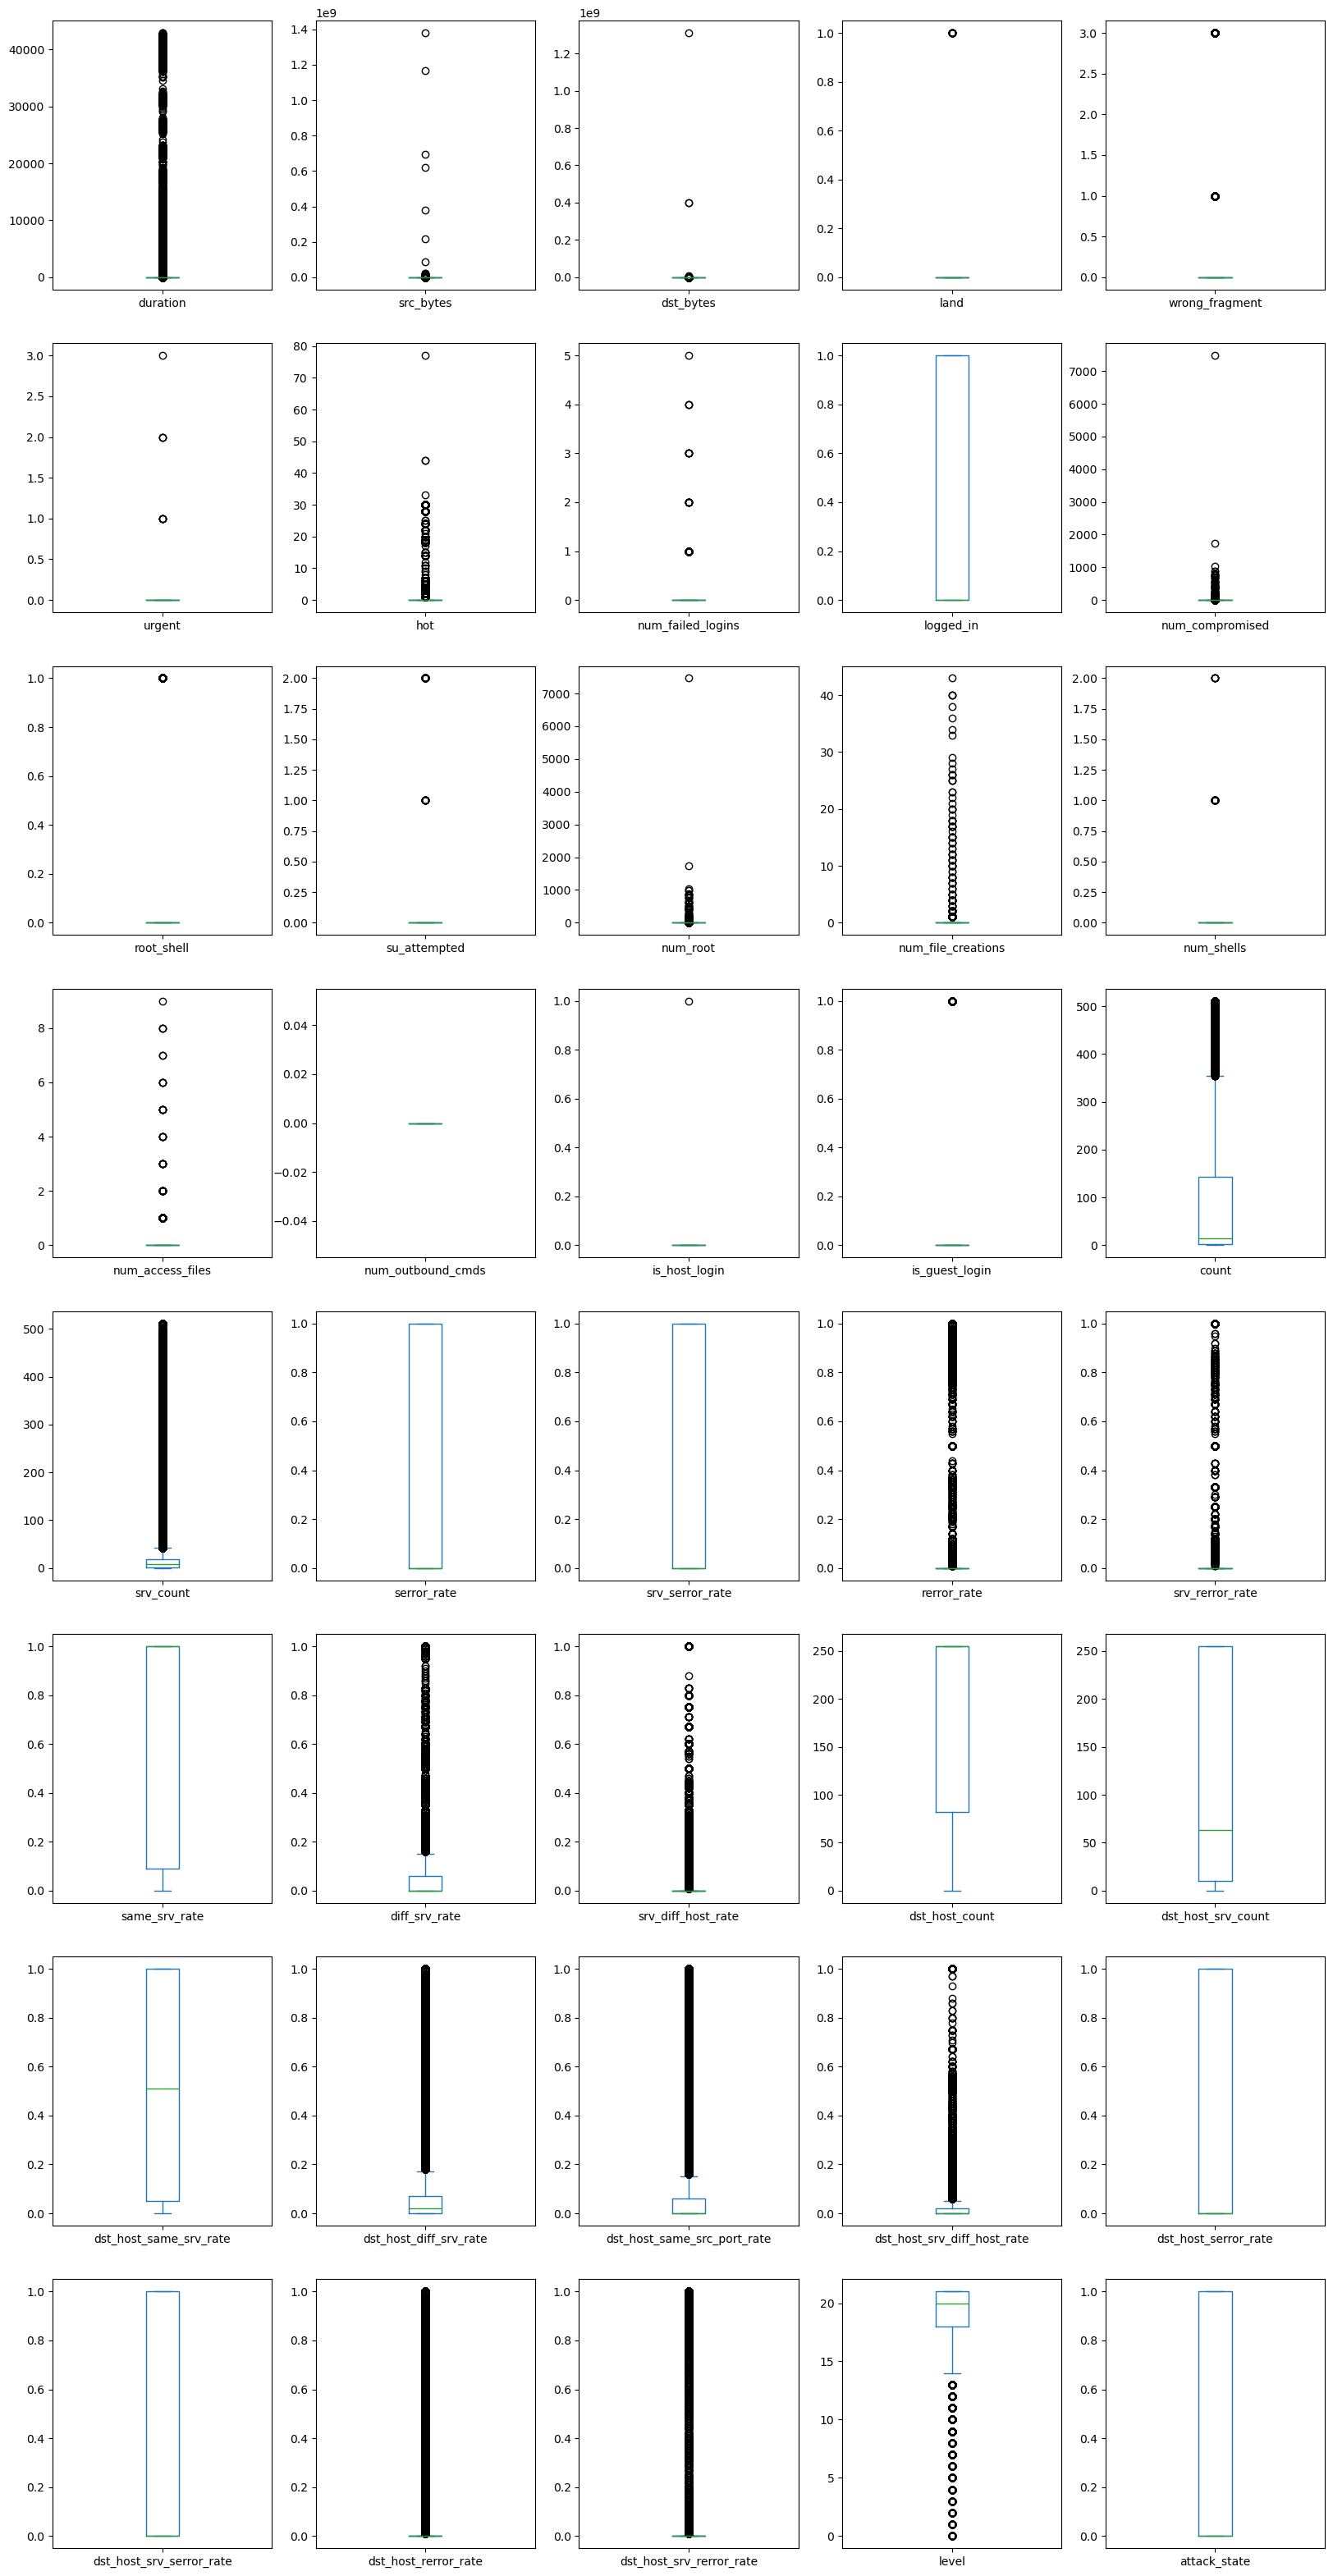

In [92]:
df_test.plot(kind='box',subplots=True, layout=(8,5),figsize=(20,40))
plt.show()

- No significant outliers in the data

### Data Encoding

In [93]:
df_train = pd.get_dummies(df_train, columns=['protocol_type','service','flag'], prefix="", prefix_sep="")
df_test = pd.get_dummies(df_test, columns=['protocol_type','service','flag'], prefix="", prefix_sep="")

In [94]:
LE = LabelEncoder()
attack_LE = LabelEncoder()
df_train['attack'] = attack_LE.fit_transform(df_train["attack"])
df_test['attack'] = attack_LE.fit_transform(df_test["attack"])

### Data Splitting

In [95]:
X_train = df_train.drop('attack', axis = 1)
X_train = df_train.drop('level', axis = 1)
X_train = df_train.drop('attack_state', axis = 1)

X_test = df_test.drop('attack', axis = 1)
X_test = df_test.drop('level', axis = 1)
X_test = df_test.drop('attack_state', axis = 1)


Y_train = df_train['attack_state']
Y_test = df_test['attack_state']

In [96]:
X_train_train, X_test_train, Y_train_train, Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test, X_test_test, Y_train_test, Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

### Data Scaling

In [97]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train = Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test = Ro_scaler.transform(X_test_test)

In [98]:
X_train_train.shape, Y_train_train.shape

((16907, 118), (16907,))

In [99]:
X_test_train.shape, Y_test_train.shape

((5636, 118), (5636,))

In [100]:
X_train_test.shape, Y_train_test.shape

((94479, 124), (94479,))

In [101]:
X_test_test.shape, Y_test_test.shape

((31493, 124), (31493,))

### Working on Trained Data

VIF

In [102]:
Est = sm.OLS(Y_train.astype(float), X_train.astype(float)).fit()
Est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           attack_state   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     917.3
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:56:04   Log-Likelihood:                 3318.4
No. Observations:               22543   AIC:                            -6409.
Df Residuals:                   22429   BIC:                            -5494.
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
duration                     1.277e-05   1.33e-06      9.601      0.000    1.02e-05    1.54e-05
src_bytes                    1.044e-08   3.17e-09      3.294      0.001    4.23e-09    1.66e-08
dst_bytes                   -3.774e-07    6.9e-08     -5.473      0.000   -5.13e-07   -2.42e-07
land                            0.1622      0.083      1.962      0.050       0.000       0.324
wrong_fragment                 -0.1481      0.010    -14.379      0.000      -0.168      -0.128
urgent                          0.0927      0.044      2.102      0.036       0.006       0.179
hot                             0.0597      0.003     21.543      0.000       0.054       0.065
num_failed_logins               0.1366      0.014      9.660      0.000       0.109       0.164
logged_in                      -0.1462      0.013    -11.141      0.000      -0.172      -0.121
num_compromised                 0.0206      0.002      9.052      0.000       0.016       0.025
root_shell                     -0.1845      0.036     -5.169      0.000      -0.254      -0.115
su_attempted                    0.0552      0.117      0.471      0.637      -0.174       0.285
num_root                       -0.0188      0.002     -9.043      0.000      -0.023      -0.015
num_file_creations             -0.0592      0.003    -17.139      0.000      -0.066      -0.052
num_shells                      0.0895      0.032      2.817      0.005       0.027       0.152
num_access_files               -0.0554      0.022     -2.502      0.012      -0.099      -0.012
num_outbound_cmds            6.556e-12   1.31e-12      4.989      0.000    3.98e-12    9.13e-12
is_host_login                   0.1516      0.069      2.195      0.028       0.016       0.287
is_guest_login                  0.1868      0.033      5.613      0.000       0.122       0.252
count                       -5.718e-05   3.39e-05     -1.686      0.092      -0.000     9.3e-06
srv_count                      -0.0007   4.32e-05    -15.631      0.000      -0.001      -0.001
serror_rate                     0.1926      0.037      5.267      0.000       0.121       0.264
srv_serror_rate                 0.0205      0.035      0.594      0.553      -0.047       0.088
rerror_rate                     0.1085      0.027      4.007      0.000       0.055       0.162
srv_rerror_rate                 0.2092      0.029      7.279      0.000       0.153       0.266
same_srv_rate                  -0.3657      0.014    -26.367      0.000      -0.393      -0.339
diff_srv_rate                  -0.0874      0.011     -7.965      0.000      -0.109      -0.066
srv_diff_host_rate             -0.1069      0.007    -14.966      0.000      -0.121      -0.093
dst_host_count                  0.0007   2.18e-05     32.465      0.000       0.001       0.001
dst_host_sr

### Data Modeling

Evaluating Function

In [103]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value)
    F1_score = metrics.f1_score(Y_test, Pred_Value)
    Recall = metrics.recall_score(Y_test, Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy, 3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity, 3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision, 3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score, 3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall, 3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names = ['Normal', 'Attack'], colorbar = "blue")
    plot_roc_curve(Model_Abb, X_test, Y_test)

Grid Search Function

In [104]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator = Model_Abb, param_grid = Parameters, cv = 3, n_jobs = -1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

Logistic Regression

In [105]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [106]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.9318625421423079, 0.9332860184528035)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.933

The Logistic Regression Model Sensitvity = 0.939

The Logistic Regression Model Precision  = 0.943

The Logistic Regression Model F1 Score   = 0.941

The Logistic Regression Model Recall     = 0.939

--------------------------------------------------



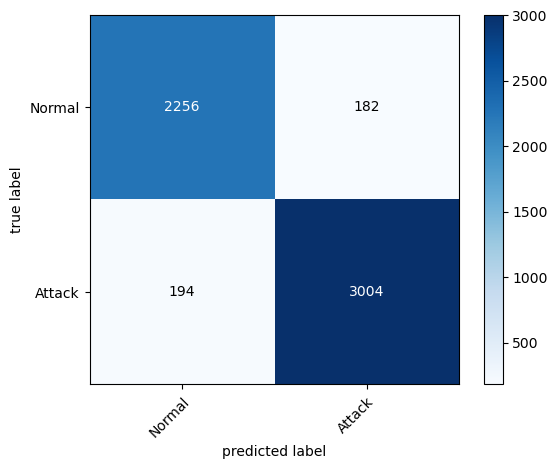

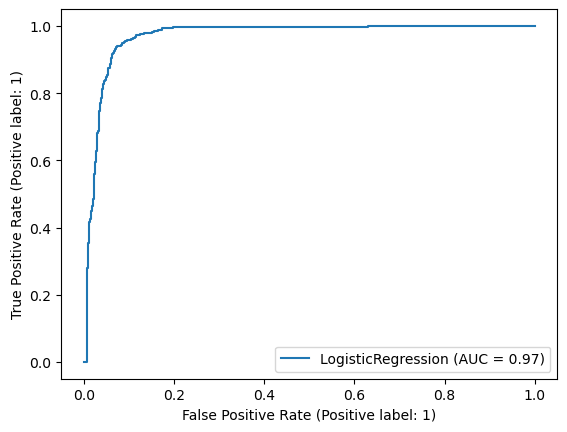

In [107]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

Decision Tree Classifier

In [108]:
DT = DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [109]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9238776837996097, 0.9256564939673527)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.926

The Decision Tree Classifier Model Sensitvity = 0.962

The Decision Tree Classifier Model Precision  = 0.912

The Decision Tree Classifier Model F1 Score   = 0.936

The Decision Tree Classifier Model Recall     = 0.962

--------------------------------------------------



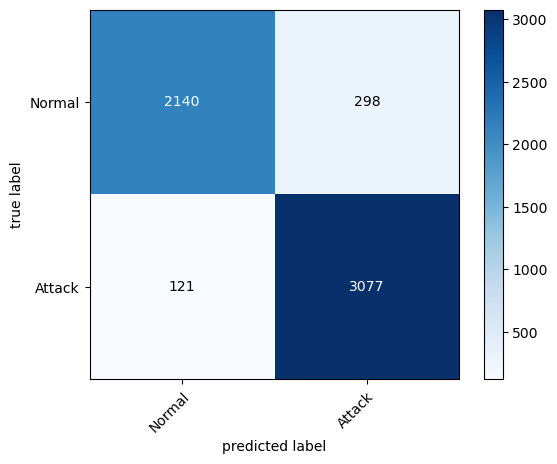

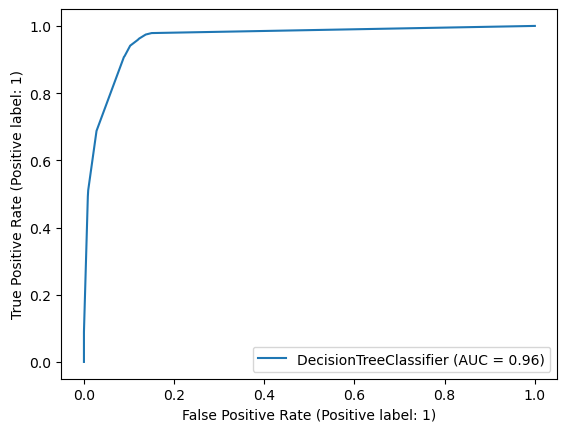

In [110]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.5, 0.9, 'X[36] <= 0.013\ngini = 0.49\nsamples = 16907\nvalue = [7273, 9634]'),
 Text(0.25, 0.7, 'X[29] <= -0.239\ngini = 0.441\nsamples = 9965\nvalue = [6697, 3268]'),
 Text(0.125, 0.5, 'X[57] <= 0.5\ngini = 0.345\nsamples = 2892\nvalue = [640, 2252]'),
 Text(0.0625, 0.3, 'X[27] <= 0.01\ngini = 0.339\nsamples = 2806\nvalue = [606, 2200]'),
 Text(0.03125, 0.1, 'gini = 0.309\nsamples = 2511\nvalue = [480, 2031]'),
 Text(0.09375, 0.1, 'gini = 0.489\nsamples = 295\nvalue = [126, 169]'),
 Text(0.1875, 0.3, 'X[4] <= 0.5\ngini = 0.478\nsamples = 86\nvalue = [34, 52]'),
 Text(0.15625, 0.1, 'gini = 0.494\nsamples = 56\nvalue = [25, 31]'),
 Text(0.21875, 0.1, 'gini = 0.42\nsamples = 30\nvalue = [9, 21]'),
 Text(0.375, 0.5, 'X[9] <= 0.5\ngini = 0.246\nsamples = 7073\nvalue = [6057, 1016]'),
 Text(0.3125, 0.3, 'X[38] <= 0.5\ngini = 0.245\nsamples = 7067\nvalue = [6055, 1012]'),
 Text(0.28125, 0.1, 'gini = 0.055\nsamples = 6230\nvalue = [6055, 175]'),
 Text(0.34375, 0.1, 'gini = 0.0\nsample

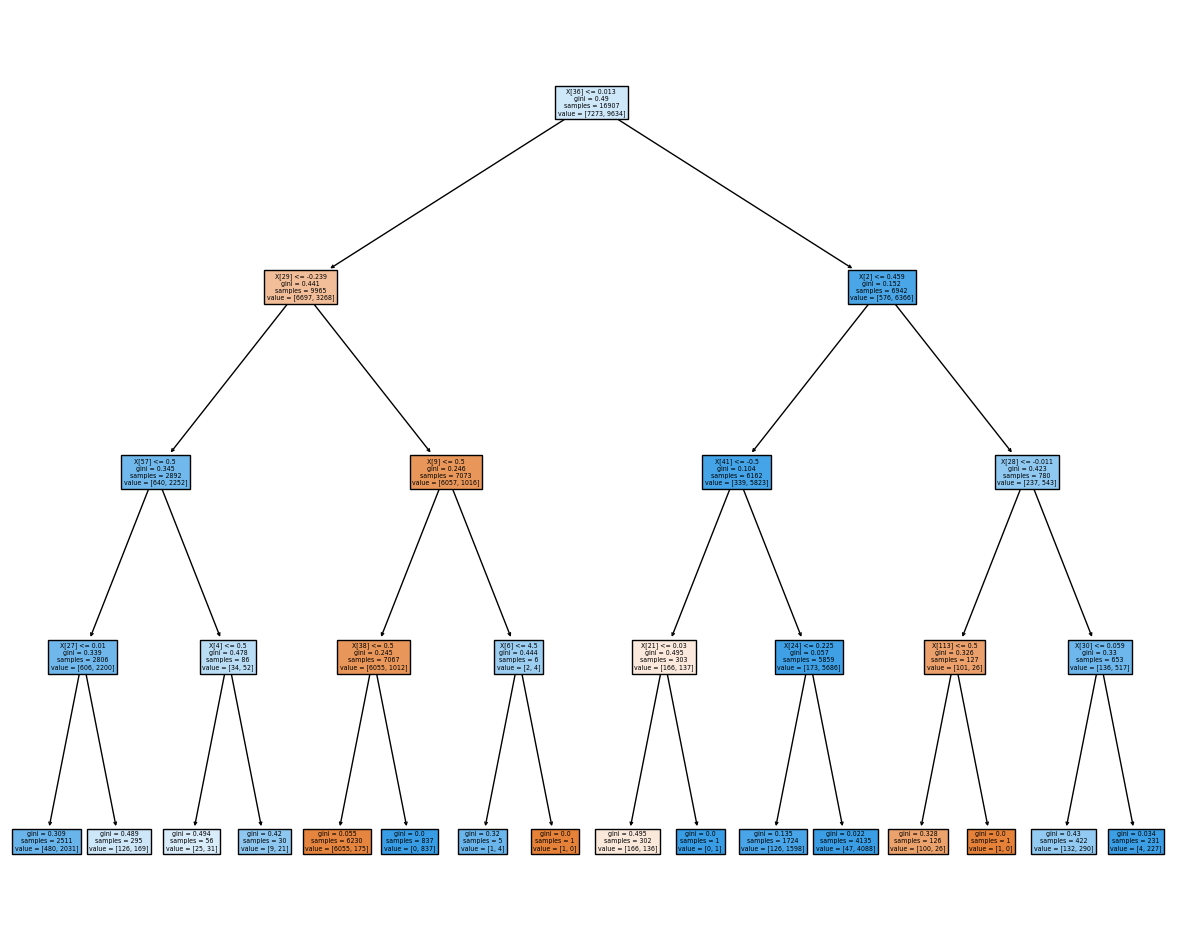

In [111]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

Random Forest Classifier

In [112]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={'max_depth': max_depth}

In [113]:
RF = RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=11)

In [114]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [115]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 0.9994677075940384)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.999

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 0.999

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



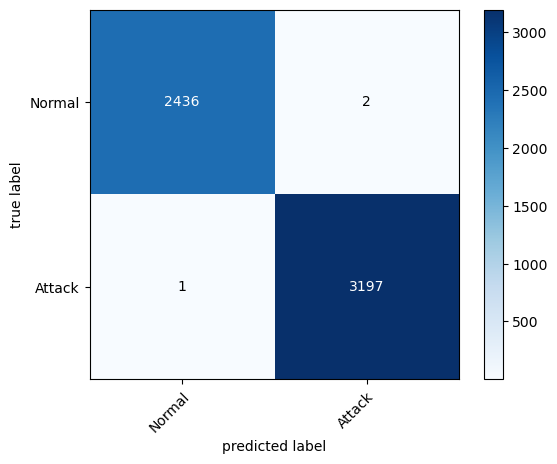

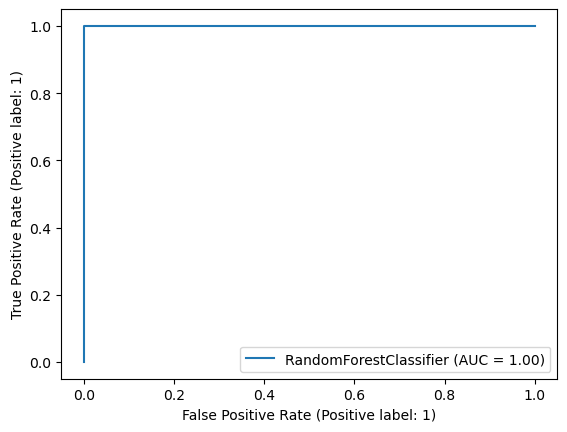

In [116]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

KNN-Model

In [117]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [118]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9930206423374933, 0.9921930447125621)

--------------------------------------------------

The KNN Model Accuracy   = 0.992

The KNN Model Sensitvity = 0.991

The KNN Model Precision  = 0.995

The KNN Model F1 Score   = 0.993

The KNN Model Recall     = 0.991

--------------------------------------------------



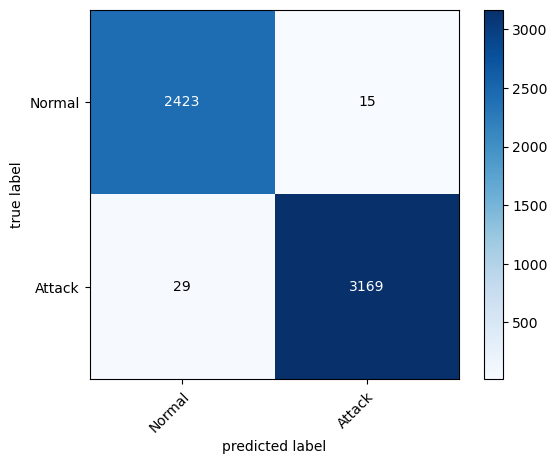

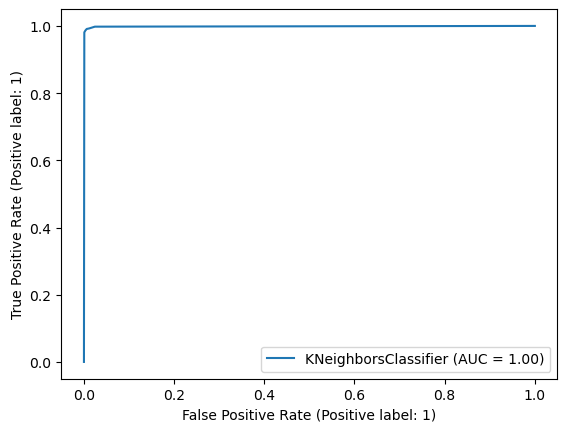

In [119]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

### SVM Classifier

1st Kernel

In [120]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train_train, Y_train_train)

LinearSVC(C=1)

In [121]:
Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

(0.9653989471816408, 0.9654009936124911)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.965

The SVM Linear SVC Kernel Model Sensitvity = 0.963

The SVM Linear SVC Kernel Model Precision  = 0.976

The SVM Linear SVC Kernel Model F1 Score   = 0.969

The SVM Linear SVC Kernel Model Recall     = 0.963

--------------------------------------------------



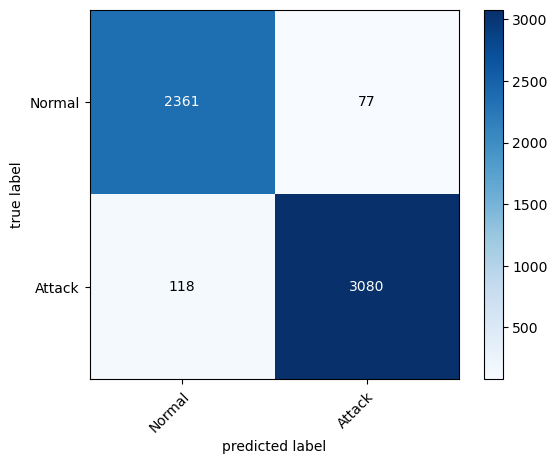

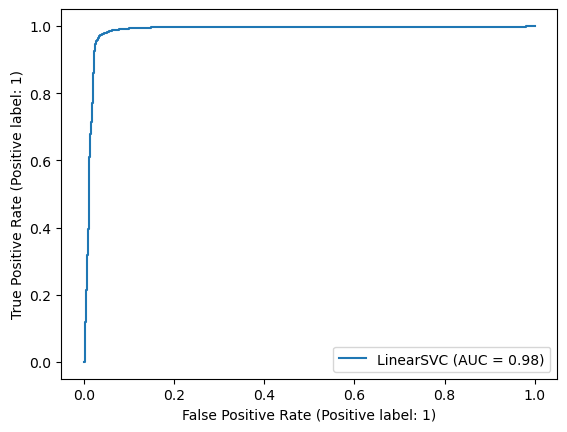

In [122]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test_train, Y_test_train)